In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_excel("../data/data_covid_fix_name.xlsx")
del df["cumul"]

In [3]:
# 欠損の削除
df.dropna(inplace=True)

In [4]:
df.reset_index(inplace=True)
del df["index"]

In [5]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,75667.65


# 階層型クラスタリング  

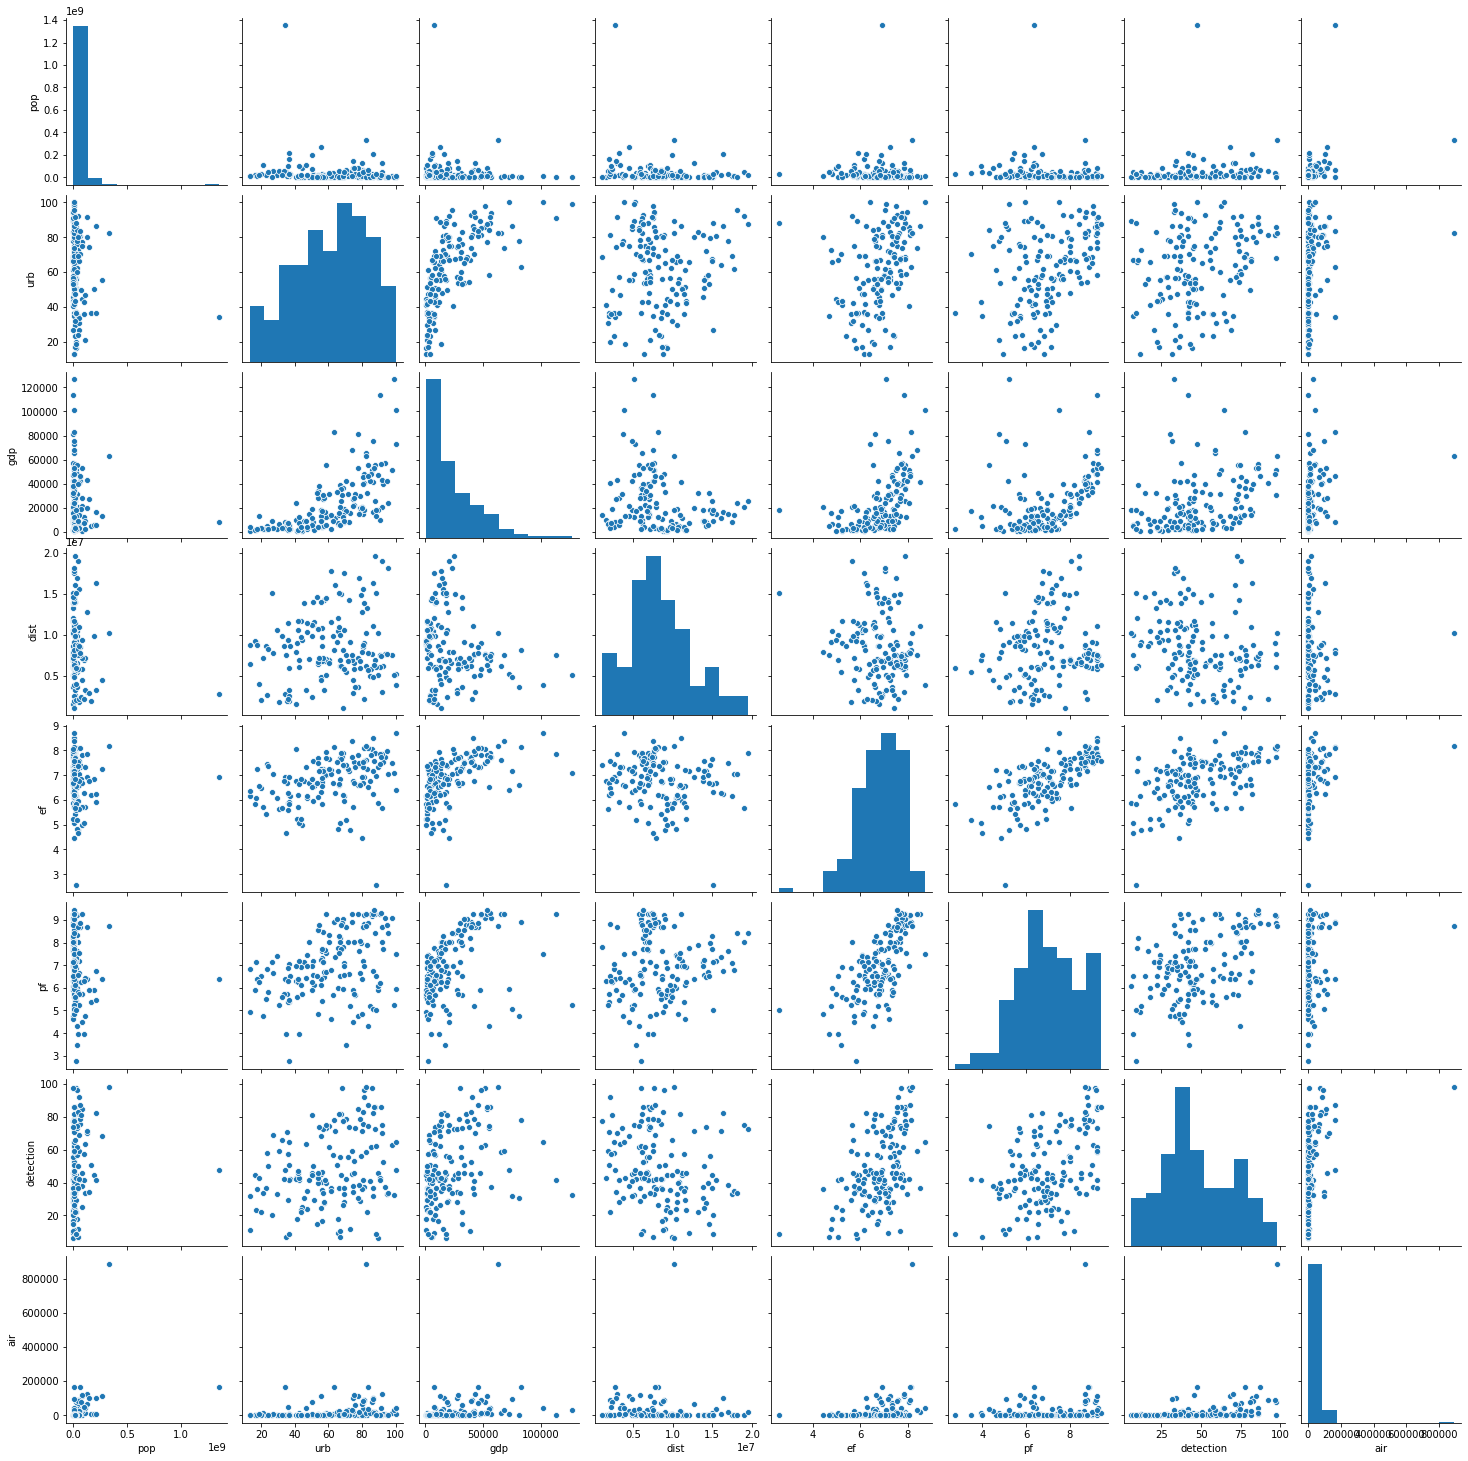

In [27]:
data = df[["pop", "urb", "gdp", "dist", "ef", "pf", "detection", "air"]]
data["pop"] = np.log(data["pop"])
data["air"] = np.log(data["air"])
data["gdp"] = np.log(data["gdp"])
sns.pairplot(data)

In [12]:
# 標準化
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

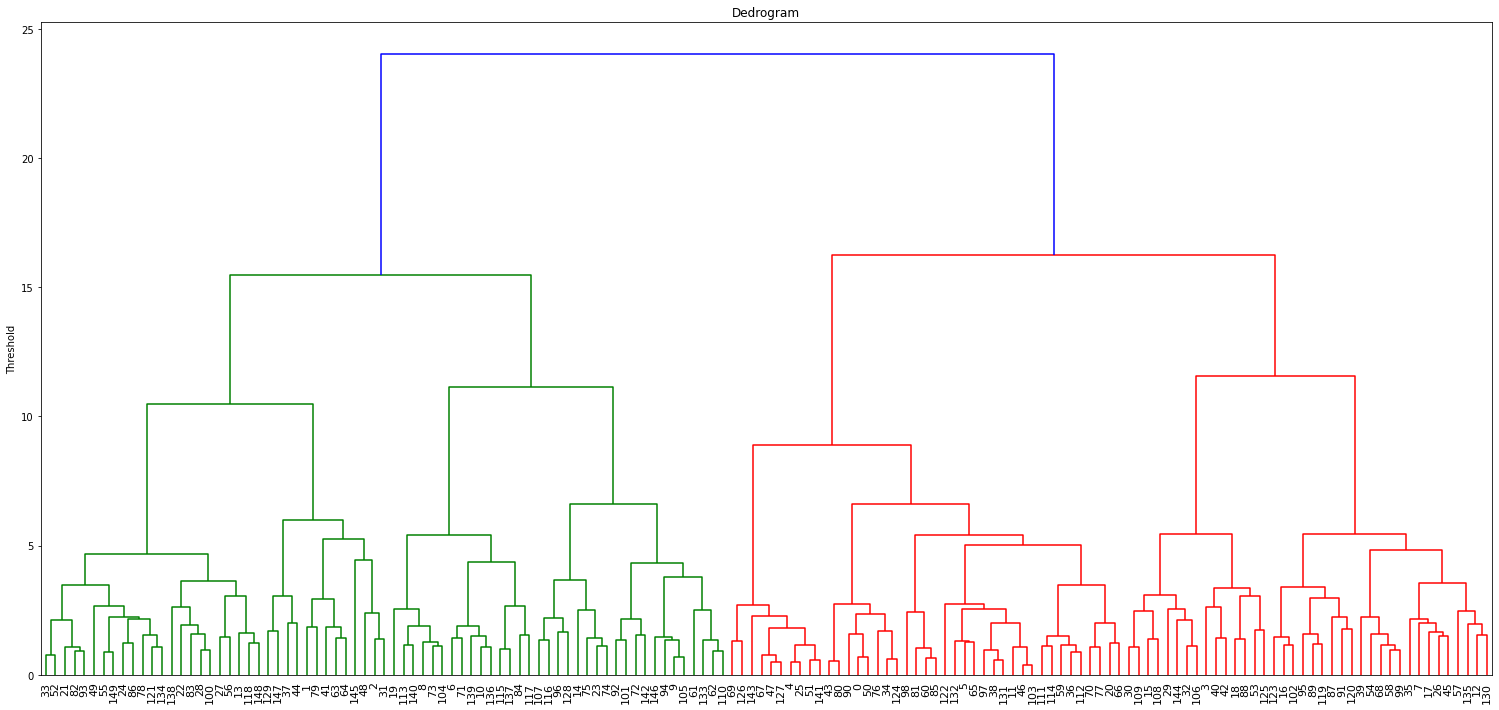

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(data_std, 
                  # 距離の定義
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #metric = 'Euclidean',
                  #method= 'single')
                  
                  # リンケージ手法
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
                  #method = 'centroid')
                  #method = 'median')
                  #method = 'single')
                  method = 'ward')

plt.figure(figsize=(26,12))
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.xticks(fontsize=11)
plt.show()

In [106]:
df.iloc[61,:]

country             India
pop            1352617328
urb                 34.03
gdp               7762.88
dist          2.77728e+06
hf                   6.64
pf                6.36884
ef                   6.91
date_first             31
detection            47.4
status                  1
air                164036
Name: 61, dtype: object

In [107]:
df.iloc[143,:]

country               USA
pop             327167434
urb                82.256
gdp               62794.6
dist          1.01967e+07
hf                   8.46
pf                8.72005
ef                   8.19
date_first             22
detection            98.2
status                  1
air                889022
Name: 143, dtype: object

# 非階層型クラスタリング  

In [28]:
data = df[["pop", "urb", "gdp", "dist", "ef", "pf", "detection", "air"]]
"""data["pop"] = np.log(data["pop"])
data["air"] = np.log(data["air"])
data["gdp"] = np.log(data["gdp"])"""

# 標準化
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

In [29]:
N_CLUSTERS = 8
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=10)
kmeans.fit(data_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [30]:
result = kmeans.labels_

0    29
1    38
2     1
3     1
4     9
5    14
6    25
7    33
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

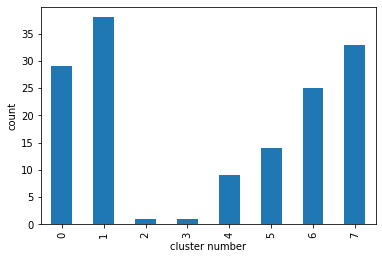

In [31]:
# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(result, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [32]:
df.iloc[result==0,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,75667.65
5,Austria,8847037,58.297,55454.689293,7.103537e+06,8.48,9.245685,7.71,58,73.2,1,12935.50
11,Belgium,11422068,98.001,51407.998337,7.548354e+06,8.29,9.067695,7.51,36,62.5,1,13639.49
25,Canada,37058856,81.411,48130.255973,8.965622e+06,8.65,9.222964,8.08,27,96.4,1,89380.00
36,Czech Republic,10629928,73.792,39743.597094,6.921795e+06,8.34,8.922165,7.75,63,44.9,1,5727.20
38,Denmark,5797446,87.874,55671.165265,6.950551e+06,8.56,9.238445,7.89,59,86.0,1,6428.70
43,Estonia,1320884,68.880,35973.776460,5.972791e+06,8.46,9.021806,7.89,60,77.6,1,31.98
46,Finland,5518050,85.382,48416.936030,5.823421e+06,8.53,9.268558,7.80,31,61.6,1,13364.84
47,France,66987244,80.444,45342.395736,8.550121e+06,8.02,8.693716,7.35,26,75.3,1,70188.03
51,Germany,82927922,77.312,53074.540118,7.170071e+06,8.53,9.247491,7.82,29,84.6,1,109796.20


In [33]:
df.iloc[result==1,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
9,Bangladesh,161356039,36.632,4371.754986,1.918841e+06,5.77,5.365573,6.18,70,50.9,1,5984.16
13,Benin,11485048,47.312,2424.755845,1.038951e+07,6.77,7.469387,6.08,78,24.2,1,0.90
21,Burkina Faso,19751535,29.358,1984.884306,1.055830e+07,6.73,7.386563,6.07,72,33.3,1,151.53
22,Burundi,11175378,13.032,744.182072,8.810122e+06,5.56,4.953952,6.17,93,11.4,1,12.00
24,Cameroon,25216237,56.374,3785.079978,9.735967e+06,5.64,5.433064,5.84,68,35.6,1,265.14
28,Chad,15477751,23.059,1968.258262,8.588725e+06,5.46,5.490401,5.42,81,36.5,1,28.33
33,Ivory Coast,25069229,50.779,4207.086934,1.120702e+07,6.59,7.204715,5.97,73,44.5,1,779.48
44,Ethiopia,109224559,20.763,2022.137961,7.146991e+06,5.25,4.772704,5.72,75,33.7,1,11501.24
45,Fiji,883483,56.248,10879.478462,8.672803e+06,7.17,7.605474,6.74,81,16.4,1,1670.22
49,Gambia,2280102,61.270,2612.000995,1.158576e+07,5.94,4.640989,7.23,79,36.9,1,53.73


In [34]:
df.iloc[result==2,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
61,India,1352617328,34.03,7762.88177,2.777278e+06,6.64,6.368844,6.91,31,47.4,1,164035.64


## エルボー法によるクラスター数の推定¶

Text(0, 0.5, 'Distortion')

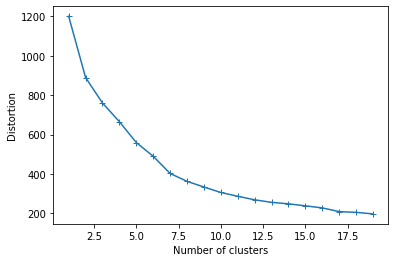

In [36]:
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(data_std)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')